In [ ]:
import numpy as np
import time
from matplotlib import pyplot as plt
from scipy.fftpack import dctn

import os
import sys

notebook_dir = os.getcwd()
src_path = os.path.join(notebook_dir, "model/")
sys.path.append(src_path)

In [36]:
block = np.array([[231, 32,  233, 161, 24,  71,  140, 245],
                [247, 40 , 248, 245, 124, 204, 36 , 107],
                [234, 202, 245, 167, 9  , 217, 239, 173],
                [193, 190, 100, 167, 43 , 180, 8  , 70 ],
                [11 , 24 , 210, 177, 81 , 243, 8  , 112],
                [97 , 195, 203, 47 , 125, 114, 165, 181],
                [193, 70 , 174, 167, 41 , 30 , 127, 245],
                [87 , 149, 57 , 192, 65 , 129, 178, 228]])

row = [231, 32,  233, 161, 24,  71,  140, 245]

In [37]:
dctn(row, norm="ortho") #1D worka

array([ 401.9902051 ,    6.60001991,  109.16736544, -112.78557857,
         65.40737726,  121.83139804,  116.65648855,   28.80040722])

In [38]:
dctn(block, norm="ortho") #2D worka

array([[ 1.11875000e+03,  4.40221926e+01,  7.59190503e+01,
        -1.38572411e+02,  3.50000000e+00,  1.22078055e+02,
         1.95043868e+02, -1.01604906e+02],
       [ 7.71900790e+01,  1.14868206e+02, -2.18014421e+01,
         4.13641351e+01,  8.77720598e+00,  9.90829620e+01,
         1.38171516e+02,  1.09092795e+01],
       [ 4.48351537e+01, -6.27524464e+01,  1.11614114e+02,
        -7.63789658e+01,  1.24422160e+02,  9.55984194e+01,
        -3.98287969e+01,  5.85237670e+01],
       [-6.99836647e+01, -4.02408945e+01, -2.34970508e+01,
        -7.67320594e+01,  2.66457750e+01, -3.68328290e+01,
         6.61891485e+01,  1.25429731e+02],
       [-1.09000000e+02, -4.33430857e+01, -5.55436908e+01,
         8.17347083e+00,  3.02500000e+01, -2.86602437e+01,
         2.44149822e+00, -9.41437025e+01],
       [-5.38783591e+00,  5.66345009e+01,  1.73021519e+02,
        -3.54234494e+01,  3.23878249e+01,  3.34576728e+01,
        -5.81167864e+01,  1.90225615e+01],
       [ 7.88439693e+01, -6.459240

In [39]:

def compare_dcts(s, n_it, step):
  ns = [s] + [step*i for i in range(1, n_it)]
  elapsed_time_h = np.zeros(len(ns))
  elapsed_time_std = np.zeros(len(ns))
  i = 0
  for n in ns:
    print(n)
    nm = np.random.randint(0, 255, size=(n, n), dtype=np.uint8)
    
    start_DCT2_h = time.time()
    main_DCT2D(nm)
    end_DCT2_h = time.time()
    elapsed_time_h[i] = end_DCT2_h - start_DCT2_h
    
    start_DCT2_std = time.time()
    dctn(nm, norm="ortho")
    end_DCT2_std = time.time()
    elapsed_time_std[i] = end_DCT2_std - start_DCT2_std
    i = i + 1
    
    
  #plot
  plt.plot(ns, elapsed_time_h, marker='o', linestyle='-', color='r', label='our DCT2D')
  plt.plot(ns, elapsed_time_std, marker='o', linestyle='-', color='g', label='scipy\'s DCT2D')
  
  plt.yscale('log')

  plt.title('Elapsed Times - DCT2D')
  plt.xlabel('Matrix Dimension (Number of Rows)')
  plt.ylabel('Time (s)')
  plt.legend()
  plt.grid(True)

  plt.show()
  
  print(elapsed_time_h)
  print(elapsed_time_std)

2
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


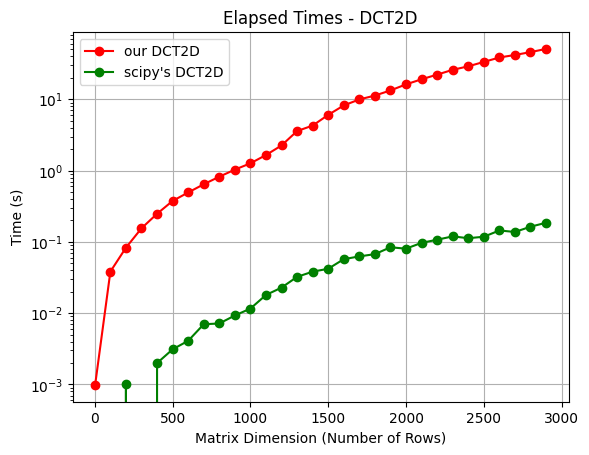

[9.86337662e-04 3.83291245e-02 8.29801559e-02 1.55291796e-01
 2.48068571e-01 3.75719309e-01 4.93634701e-01 6.43276215e-01
 8.21847916e-01 1.03171444e+00 1.26630998e+00 1.65342140e+00
 2.25411153e+00 3.58794808e+00 4.28139567e+00 6.05269384e+00
 8.20666766e+00 9.96403742e+00 1.12871864e+01 1.33265283e+01
 1.62040160e+01 1.91037757e+01 2.22016976e+01 2.59281111e+01
 2.90230186e+01 3.34530725e+01 3.86192939e+01 4.18770704e+01
 4.59382691e+01 5.09181349e+01]
[0.         0.         0.00100231 0.         0.00199509 0.00311518
 0.00409794 0.00700259 0.00717258 0.00928831 0.01160693 0.0180223
 0.02284741 0.03235364 0.03824472 0.04199958 0.05727816 0.06263828
 0.06735039 0.08408689 0.08036375 0.09702206 0.10726428 0.1196084
 0.11268187 0.11814284 0.14466763 0.13789058 0.16330075 0.18567348]


In [44]:
compare_dcts(2, 30, 100)